In [1]:
import sys 
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
import warnings
import seaborn as sns
# To suppress all warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pandas as pd
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split
#import scaler
from sklearn.preprocessing import StandardScaler

In [125]:
plt.rcParams['text.usetex']=True
plt.rcParams['ytick.minor.visible'] =True
plt.rcParams['xtick.minor.visible'] = True

In [2]:
%load_ext autoreload
%autoreload 2
from database import Magneticum
from relation import Scaling
from relation import Distribution
from relation import Analysis
from relation import RandomForest

In [3]:
def data_manupulation(df):
    dff = df.copy()
    dff = dff[['Yksz','M','gas_frac','Vz']]
    q_list = [0,0.25,0.5,0.75,1]
    labels = [1,2,3,4]
    dff['M_q'] = pd.qcut(dff['M'],q=q_list,labels=labels)
    return dff
def SS(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    return scaled_df

In [4]:
snaps = ['140','132','096']

In [5]:
boxno = 50

In [6]:
df_140 = Analysis(boxno,'140','').get_dataframe()


In [7]:
df_140_m = data_manupulation(df_140)

In [8]:
df_140_ms = SS(df_140_m)

In [9]:
df_140_ms

,Yksz,M,gas_frac,Vz,M_q
0,3.785629,5.970635,5.078922,-1.390367,1.341718
1,3.579983,5.259511,4.574609,-1.816945,1.341718
2,3.265185,5.594615,4.972068,-0.155893,1.341718
3,3.050523,3.487114,4.303074,0.253080,1.341718
4,3.012627,5.325033,4.433476,-1.325993,1.341718
...,...,...,...,...,...
10488,-0.772869,-1.113360,1.138365,-0.593155,-1.341462
10489,-0.103052,-1.077766,0.543450,-0.845292,-1.341462
10490,-0.532824,-1.091878,-0.399874,0.719765,-1.341462
10491,0.731956,-1.026046,1.654220,1.507760,-1.341462


In [53]:
X = df_140_ms[['gas_frac','Vz']]
y = df_140_ms['Yksz'] - df_140_ms['M']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5,stratify=df_140_m.M_q, random_state=42)

In [12]:
model = PySRRegressor(
    niterations=10,  
    binary_operators=["+", "*", "/", "^"],
    unary_operators=[
        "exp",
        "abs",
        "sqrt",
    ],
    procs=4,
    maxdepth=10,
    progress=True,
)

In [13]:
model.fit(X_train, y_train)

In [91]:
for i in range(9):
    print(model.sympy(i))

0.0160880570000000
-0.19810383*gas_frac
Abs(Vz) - 0.76125395
sqrt(Abs(Vz)) - 0.79137576
Abs(Vz)**0.7185264 - 0.7647494
1.4369155*sqrt(Abs(Vz)) - 1.14419088216607
-0.14833386*gas_frac + sqrt(Abs(Vz)) - 0.83143383
-0.14833386*gas_frac + sqrt(Abs(Vz)) - 0.8092674
-0.7450802 + exp(-0.19936942628806*re(gas_frac))*Abs(Vz)**0.6640207


In [85]:
model.sympy()

Abs(Vz) - 0.76125395

['29.9', '30.8', '31.6', '32.4', '33.3', '34.1', '34.9']

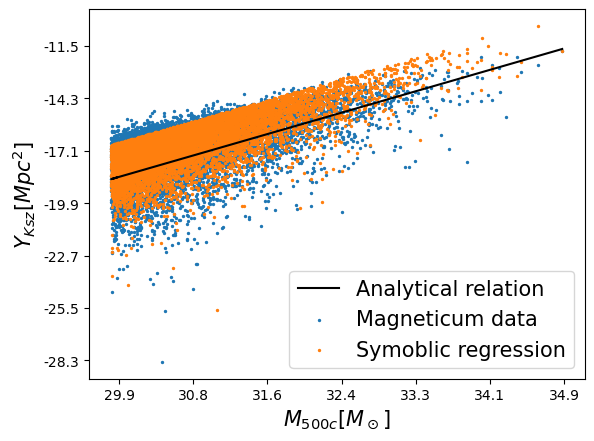

In [48]:
plt.scatter(df_140_ms.M,df_140_ms.Yksz,s=2,label='Magneticum data')
plt.scatter(df_140_ms.M, (df_140_ms.M*.7 - np.abs(df_140_ms.Vz) +1 )  , s=2,label='Symoblic regression')
plt.plot(df_140_ms.M,df_140_ms.M*.7 -.3,c='k',label='Analytical relation')
plt.ylabel('$Y_{Ksz} [Mpc^2]$',fontsize=15)
plt.xlabel('$M_{500c} [M_\odot]$',fontsize=15)
plt.xticks(np.linspace(-1,6,7),[f"{i:.1f}" for i in np.linspace(min(df_140_m.M),max(df_140_m.M),7)],fontsize=10)
plt.yticks(np.linspace(-8,4,7),[f"{i:.1f}" for i in np.linspace(min(df_140_m.Yksz),max(df_140_m.Yksz),7)],fontsize=10)
plt.legend(loc='lower right',fontsize=15)
plt.savefig('test5.pdf',dpi=300,bbox_inches='tight')
#plt.scatter(df_140_ms.M,(df_140_ms.M - 2*np.abs(df_140_ms.Vz) )

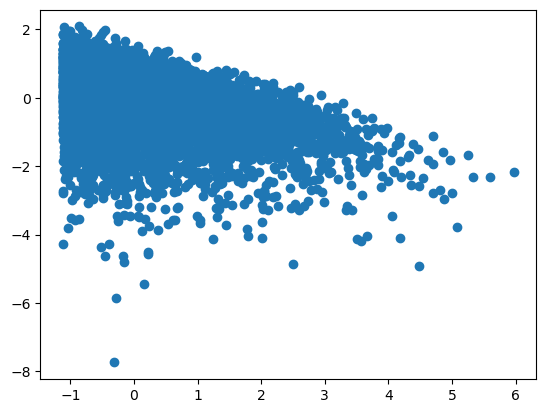

In [54]:
plt.scatter(df_140_ms.M,y)

In [101]:
a,b =  train_test_split(df_140_ms, train_size=0.4,stratify=df_140_m.M_q, random_state=42)

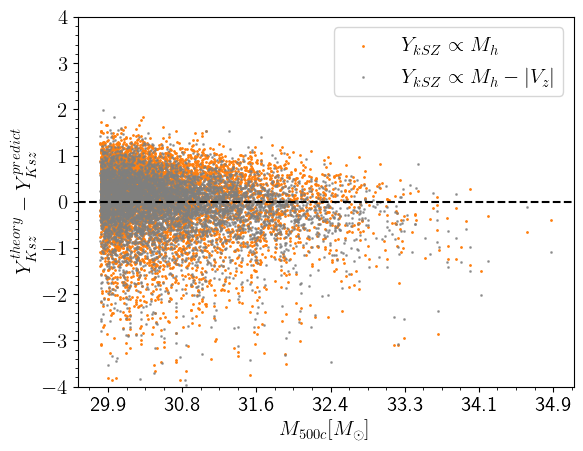

In [127]:
plt.scatter(b.M, b.Yksz - b.M*0.7,s=1,c='C1',label='$Y_{kSZ} \\propto M_h$')
plt.scatter(b.M, b.Yksz - b.M*0.7 - np.abs(b.Vz) + 0.7, s=1,alpha=.7,c='C7',label='$Y_{kSZ} \\propto M_h - |V_z|$')
plt.ylim(-4,4)
plt.axhline(0,c='k',ls='--')
plt.legend(fontsize=15)
plt.xticks(np.linspace(-1,6,7),[f"{i:.1f}" for i in np.linspace(min(df_140_m.M),max(df_140_m.M),7)],fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('$M_{500c} [M_\odot]$',fontsize=15)
plt.ylabel('$Y_{Ksz}^{theory}- Y_{Ksz}^{predict}$',fontsize=15)
plt.savefig('SE_symbolic.pdf',dpi=300,bbox_inches='tight')


In [94]:
np.sum((b.Yksz - b.M*0.7)**2)/len(b.Yksz)

0.6969228500507442

In [96]:
np.sum((b.Yksz - b.M*0.7 - np.abs(b.Vz) + 0.7)**2)/len(b.Yksz)

0.46498479211711263

In [99]:
((.70 - 0.46)/ .70)*100

34.28571428571428

In [31]:
(0.7*(df_140_ms.M  - np.abs(df_140_ms.Vz)+0.7))[:10]

0    3.696188
1    2.899797
2    4.297105
3    2.753824
4    3.289328
5    3.455162
6    2.129630
7    3.779909
8    3.437797
9    2.976538
dtype: float64

In [30]:
(df_140_ms.M*.7 -.3)[:10]

0    3.879445
1    3.381658
2    3.616230
3    2.140980
4    3.427523
5    3.198084
6    2.027599
7    2.994502
8    3.258059
9    3.104445
Name: M, dtype: float64